# Coupons.csv Analysis

This Jupyter Notebook is intended to explore the coupons.csv dataset. To get a better idea of what is exactly being analyzed, please refer to the README.md script provided in the repo.

In [28]:
# Import all necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Import the coupons dataset
data = pd.read_csv('data/coupons.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## Data Cleaning

In order to clean the data, we just want to gain a better understanding of the dataset given and clean it up in such a way which optimizes its readability.

In [29]:
# A useful thing to begin with is finding and eliminating any rows with missing values
print(data.isnull().sum())
print(data.shape)
# There 6 columns which have missing rows. 'car' in particular is missing many entries. Hence we should probably eliminate
# this column
del data['car']
# Additionally, we don't really want to get into the business of dealing with rows that contain missing values as it could
# complicate out data analysis, hence we will rewrite the dataset to not include these problematic rows.
data = data[~((data['Bar'].isnull()) | (data['CoffeeHouse'].isnull()) | (data['CarryAway'].isnull()) | 
       (data['RestaurantLessThan20'].isnull()) | (data['Restaurant20To50'].isnull()))]
print(data.isnull().sum())
print(data.shape)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
(12684, 26)
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender       

Now that we have eliminated all these rows, we see that we have lost 605 rows, so not bad! Now we can continue cleaning the data up so that we can view it easier.

In [30]:
# We will look at the values that each column takes and put it into a dictionary.
data_vals_dic = {}
for i in data.columns.tolist():
    data_vals_dic[i] = data[i].value_counts().index.tolist()
data_vals_dic
# Looking at the values of each column, the only column which has questionable interpretation is the 'age' column. We
# will rename the values in this column to improve the readability
new_age_dic = {'21':'21~25','26':'26~30','31':'31~35','36':'36~40','41':'41~45','46':'46~50'}
data['age'] = data['age'].replace(new_age_dic)

## Data Analysis

Now that we have gotten past the 'cleaning data' stage, we can now focus on the actual data analysis!

Since we are trying to figure out the differences in the population that accepted and rejected the coupon, let's just gather some general facts about the data set.

In [31]:
# Start by just getting the proportion of people who accepted the coupon
print(data['Y'].mean())
# So roughly over half of the drivers opted to take the coupon. To dig into this further, let's break this proportion down
# into the groups of each column, which will hopefully give us a better insight.
for i in data.columns.tolist():
    print(data.groupby(i)[['Y']].mean())

0.5693352098683666
                        Y
destination              
Home             0.508266
No Urgent Place  0.634003
Work             0.503968
                  Y
passanger          
Alone      0.527048
Friend(s)  0.676302
Kid(s)     0.496802
Partner    0.594727
                Y
weather          
Rainy    0.462075
Snowy    0.476334
Sunny    0.595042
                    Y
temperature          
30           0.537130
55           0.537138
80           0.599646
             Y
time          
10AM  0.607970
10PM  0.515502
2PM   0.660752
6PM   0.582846
7AM   0.503968
                              Y
coupon                         
Bar                    0.411918
Carry out & Take away  0.737719
Coffee House           0.496331
Restaurant(20-50)      0.446013
Restaurant(<20)        0.709009
                   Y
expiration          
1d          0.627811
2h          0.495018
               Y
gender          
Female  0.547508
Male    0.592347
                Y
age              
21~25    0.594

The information produced in the above chunk of code gives some valuable insight. 
Before we delve into the intricacies, we need to set some general rules:

1. Only the columns which are mentioned are seen to have some sort of relationship or difference in the standard norm.
2. Columns are deemed to be significant if the range within the column proportion values is greater than 0.12, or if any column proportion value deviates more than 0.15 from the acceptance rate.

These values are arbitrary, but they are purely set in order to negate the possibility of over-analyzing to the point where each column becomes 'significant'.

Returning to the data, using the rules established, we notice that:

1. Drivers who have 'No Urgent Place' to be are 13% more likely to accept a coupon than drivers who are going 'Home' or to 'Work'.
2. Drivers sitting with any friends are much more likely to accept a coupon compared to any other seating scenario.
3. Sunnier environments motivate drivers to accept coupons.
4. Drivers approached during the day are roughly 12% more likely to accept the coupon compared to the morning or night.
5. Coupons for cheap dinners or takeaway were overwhelmingly accepted while the rest were more evenly split. We will investigate this category more later.
6. Coupons expiring in a day were accepted more compared to 2 hour coupons.
7. Older populations (50plus) were less likely to accept the coupon.
8. Widowed individuals were less likely to accept the coupon.
9. Drivers with the lowest education pedigree (Some High School) were overwhelmingly more likely to accept the coupon.
10. Drivers who were retired were less likely to accept the coupon compared to any other professions.
11. Drivers who went to the Coffee Houses fairly regularly were 15% more likely to accept a coupon.
12. Drivers who went to expensive restaurants fairly regularly were 13% more likely to accept a coupon.
13. Drivers were 15% less likely to accept a coupon from a place that was 25 minutes away.

Clearly, there are many overarching themes, but we can go even deeper as there are 5 different coupon categories: Bar, Coffee House, Takeaway, Cheap Restaurants, and Expensive Restaurants. We've already seen a great deviation in the proportion of drivers who accepted each coupon category, so let's explore these new categories.

Text(0.5, 1.0, 'Barplot of Coupon Counts')

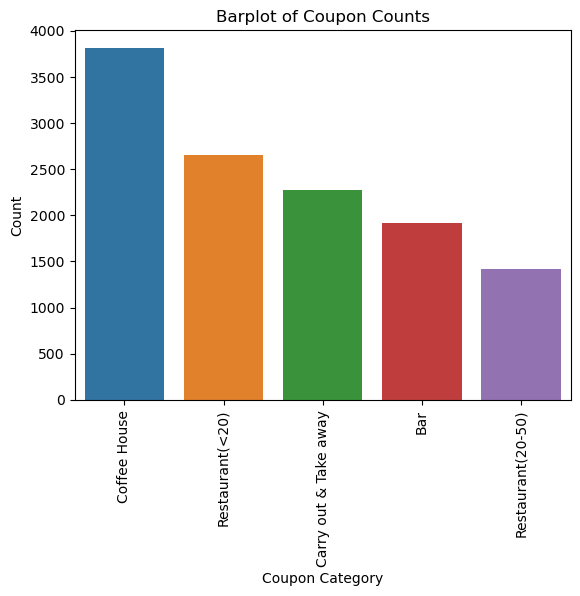

In [32]:
# Let's just get a biplot of each category to understand the raw values better.
sns.barplot(x=data['coupon'].value_counts().index, y=data['coupon'].value_counts())
plt.xticks(rotation = 90)
plt.xlabel('Coupon Category')
plt.ylabel('Count')
plt.title('Barplot of Coupon Counts')

### Coffee House Analysis

We will start by gathering the data where drivers were only offered the Coffee House coupon.

In [34]:
data_CH = data.query('coupon == "Coffee House"')
data_CH.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21~25,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21~25,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21~25,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


Having subsetted the original dataset, now we can do a similar process as displayed above to reveal any univariate relationships.

In [36]:
# Start by just getting the proportion of people who accepted the Coffee House coupon.
print(data_CH['Y'].mean())
# Will give us the breakdown of proportions in each variable group for Coffee House.
for i in data_CH.columns.tolist():
    print(data_CH.groupby(i)[['Y']].mean())

0.49633123689727465
                        Y
destination              
Home             0.362613
No Urgent Place  0.578178
Work             0.440000
                  Y
passanger          
Alone      0.433936
Friend(s)  0.597447
Kid(s)     0.471503
Partner    0.567010
                Y
weather          
Rainy    0.516279
Snowy    0.428070
Sunny    0.500905
                    Y
temperature          
30           0.441472
55           0.452010
80           0.526980
             Y
time          
10AM  0.634772
10PM  0.429078
2PM   0.545455
6PM   0.412272
7AM   0.440000
                     Y
coupon                
Coffee House  0.496331
                   Y
expiration          
1d          0.580626
2h          0.429110
               Y
gender          
Female  0.491112
Male    0.501895
                Y
age              
21~25    0.517773
26~30    0.513174
31~35    0.483816
36~40    0.468586
41~45    0.492114
46~50    0.506912
50plus   0.419660
below21  0.678322
                        

Before we proceed with this analysis, we will first list the relationships which are similar to that of the overall data (if significant). After that, we will reveal the relationships unique to the coupon category.

Looking at the Coffee House (CH) data, we notice that the observations in the list below are in line with the general trends of the overall dataset:

1. Drivers with No Urgent Place to be are much more likely to accept the CH coupon compared to the other categories.
2. Drivers who were with friends were more likely to accept the CH coupon compared to other categories.
3. Drivers approached during the day were over 14% more likely to accept the CH coupon.
4. Coupons with a 1 day expiration were accepted over 16% more than coupons expiring in 2 hours.
5. Older populations (50plus) were much less likely to accept the CH coupon.
6. Widowed individuals were less inclined to take the CH coupon.
7. Drivers with the lowers education standing were roughly 12% more likely to use the CH coupon compared to other groups.
8. Individuals who went to Coffee Houses at least once a month were at least 20% more likely to accept the CH coupon.
9. Drivers who went to expensive restaurants with increasing regularity were increasingly more likely to accept the CH coupon.
10. Drivers were roughly 16% less likely to accept a CH coupon from a place that was 25 minutes away.

Now the next list is observations which are unique to the Coffee House dataset:

1. Drivers who had Partners (not just friends) with them were also more likely to accept the coupon.
2. Drivers who were below21 were 17% more likely to accept the coupon.
3. People with an income between $75k - $88k were severely less likely to accept the CH coupon.

Looking at these univariate relationships, drivers who were given the CoffeeHouse coupon slightly deviated from all drivers, but not enough to warrant a lot more investigation.

What we can do is use some multivariate relationships to see if any of our deviations become more apparent. Some of the possible interactions can include:

1. Seeing the effect of crossing drivers with partners, with an income of $75k - $88k.
2. etc. (we won't do too much interaction observations as it can get quite complicated and this is meant to be a brief report)

In [45]:
# This is the analysis of the first possible interaction
pass_part = ['Partner']
inc_75_88 = ['$75000 - $87499']
data_CH.query('passanger in @pass_part and income in @inc_75_88')['Y'].mean()

0.4

Note that this interaction produces that drivers with partners in the car and having an income between 75-88k were only 40% likely to accept the CH coupon.

One thing I want to point out is that from our initial gathering, we noticed that drivers with partners there were much more likely to accept the coupon, while drivers with an income between 75-88k were less likely to accept the coupon. When we cross these 2 ideas, we get a proportion somewhere in the middle of the 2 values. This kind of interaction does not really produce any valuable information as they are essentially cancelling each other out. 

In reality, we want to find interactions that amplify an effect (ie crossing 2 proportions that are very likely, or vice-versa).

From now, we will only create interactions that may amplify the effects.

### Restaurant(<20) Analysis

In [47]:
data_Che_Res = data.query('coupon == "Restaurant(<20)"')
data_Che_Res.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
29,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
31,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21~25,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
42,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
44,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46~50,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1


In [48]:
# Following a similar process to what we have already done.
print(data_Che_Res['Y'].mean())
for i in data_Che_Res.columns.tolist():
    print(data_Che_Res.groupby(i)[['Y']].mean())

0.7090086694308331
                        Y
destination              
Home             0.557652
No Urgent Place  0.794226
Work             0.587591
                  Y
passanger          
Alone      0.640876
Friend(s)  0.803549
Kid(s)     0.710843
Partner    0.783673
                Y
weather          
Rainy    0.393750
Snowy    0.495798
Sunny    0.768258
                    Y
temperature          
30           0.537285
55           0.730586
80           0.759840
             Y
time          
10AM  0.717770
10PM  0.507901
2PM   0.813636
6PM   0.826573
7AM   0.587591
                        Y
coupon                   
Restaurant(<20)  0.709009
                   Y
expiration          
1d          0.835913
2h          0.588538
               Y
gender          
Female  0.698295
Male    0.720092
                Y
age              
21~25    0.738095
26~30    0.741874
31~35    0.708134
36~40    0.647687
41~45    0.716049
46~50    0.750000
50plus   0.639474
below21  0.737288
                

Looking at the Restaurant(<20) (CR) data, we notice that the observations in the list below are in line with the general trends of the overall dataset:

1. Drivers with No Urgent Place to be are 20% more likely to accept the CR coupon compared to the other categories.
2. Drivers who were with friends were more likely to accept the CR coupon compared to other categories.
3. Drivers approached during the day were over 25% more likely to accept the CR coupon.
4. Coupons with a 1 day expiration were accepted over 24% more than coupons expiring in 2 hours.
5. Widowed individuals were less inclined to take the CR coupon.
6. Drivers were roughly 43% less likely to accept a CR coupon from a place that was 25 minutes away.
7. Sunnier environments made drivers roughly 30% more likely to accept the CR coupon

Now the next list is observations which are unique to the CR dataset:

1. Drivers with Partners (not just friends) with them were more likely to accept the CR coupon.
2. Drivers who were approached in 55 or 80 degree weather were 20% more likely to accept the CR coupon.
3. In all occupations, drivers who were in the Building & Grounds Cleaning & Maintenance sector were less than 50% likely to accept the coupon.
4. Drivers who went to cheap restaurants with increasing regularity were increasingly more likely to accept the CR coupon.

The CR dataset substantially deviated from the overall dataset and has provided us with more substance to work with. 2 interactions we will pay attention to is the weather and temperature, and passanger and destination.

In [52]:
# Looking at the first interaction
sun_wea = ['Sunny']
high_temp = [55,80]
print(data_Che_Res.query('weather in @sun_wea and temperature in @high_temp')[['Y']].mean())
print(data_Che_Res.query('~(weather in @sun_wea and temperature in @high_temp)')[['Y']].mean())
# Looking at the second interaction
pass_fr_part = ['Friend(s)','Partner']
dest_nup = ['No Urgent Place']
print(data_Che_Res.query('passanger in @pass_fr_part and destination in @dest_nup')[['Y']].mean())
print(data_Che_Res.query('~(passanger in @pass_fr_part and destination in @dest_nup)')[['Y']].mean())

Y    0.780203
dtype: float64
Y    0.50366
dtype: float64
Y    0.808577
dtype: float64
Y    0.652917
dtype: float64


Looking at the first interaction, between weather and temperature, we see that drivers approached when it was sunny and mid to high temperatures were roughly 30% more likely to accept the CR coupon compared to drivers who were approached in low temperatures and non-sunny conditions. This is a great example to show that there is a significant interaction between weather and temperature in CR coupons, which would not have been revealed had we continued to look at the overall data holistically.

On the other hand, the second interaction, between passanger and destination, did not produce as strong of an interaction as drivers who had friends or partners and no urgent place to be were only 15% more likely to accept the CR coupon than those in other circumstances.

### Carry out & Take away Analysis

In [53]:
data_Co_Ta = data.query('coupon == "Carry out & Take away"')
data_Co_Ta.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21~25,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21~25,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46~50,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46~50,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1


In [54]:
print(data_Co_Ta['Y'].mean())
for i in data_Co_Ta.columns.tolist():
    print(data_Co_Ta.groupby(i)[['Y']].mean())

0.737719298245614
                        Y
destination              
Home             0.791935
No Urgent Place  0.761547
Work             0.661180
                  Y
passanger          
Alone      0.731889
Friend(s)  0.759547
Kid(s)     0.697183
Partner    0.717391
                Y
weather          
Rainy    0.611296
Snowy    0.715753
Sunny    0.764078
                    Y
temperature          
30           0.760504
55           0.720803
80           0.730845
             Y
time          
10AM  0.700000
10PM  0.767654
2PM   0.866029
6PM   0.820823
7AM   0.661180
                              Y
coupon                         
Carry out & Take away  0.737719
                   Y
expiration          
1d          0.785612
2h          0.662921
               Y
gender          
Female  0.715136
Male    0.761775
                Y
age              
21~25    0.740343
26~30    0.734694
31~35    0.718919
36~40    0.744770
41~45    0.730392
46~50    0.719008
50plus   0.770149
below21  0.721154

Looking at the Carry out & Take away (CT) data, we notice that the observations in the list below are in line with the general trends of the overall dataset:

1. Drivers with No Urgent Place to be are 10% more likely to accept the CT coupon compared to the other categories.
2. Sunny environments caused roughly 15% of drivers to accept the CT coupon.
3. Coupons with a 1 day expiration were accepted over 12% more than coupons expiring in 2 hours.
4. Drivers with the lowest education pedigree (Some High School) were roughly 20% more likely to accept the CT coupon.

Now the next list is observations which are unique to the CT dataset:

1. Drivers who were going home were 13% more likely to accept the CT coupon compared to the Work category.
2. Drivers who were approached later during the day were roughly 14% more likely to accept the CT coupon.
3. Contrary to the general data, widowed drivers were 13% more likely to accept the CT coupon.
4. People who went to the bar more than 8 times a month were roughly 15% less likely to take the coupon.
5. People who went to coffee houses more than 8 times a month were less likely to take a CT coupon.
6. Drivers who never went to cheap restaurants were 14% more likely to accept the CT coupon.

This dataset actually does not have many common themes with the overall dataset, which opens the door to many interactions. However, instead of just purely using a quantitative method to revealing more multivariate relationships, let's use a qualitative method to diversify the way we analyze our data. 

Through the data, we see that drivers who are going home are likely to take the coupon. This might be because they want to relax, and it is easier to decompress by just ordering food rather than making it. Additionally, drivers accepted coupons presented later in the day. Intuitively, this should make sense because people are less likely going to want to drive late at night to grab dinner. Consequently, this would cause people to order food outside so that they can get food within the confines of their home or workplace.

We could do more analysis, but I will keep this report brief. But keep in mind that this kind of analysis would go really well with the quantitative side as well.

### Bar Analysis

In [55]:
data_Bar = data.query('coupon == "Bar"')
data_Bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46~50,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46~50,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [56]:
print(data_Bar['Y'].mean())
for i in data_Bar.columns.tolist():
    print(data_Bar.groupby(i)[['Y']].mean())

0.41191845269210664
                        Y
destination              
Home             0.452282
No Urgent Place  0.412797
Work             0.367965
                  Y
passanger          
Alone      0.409290
Friend(s)  0.566038
Kid(s)     0.206186
Partner    0.388462
                Y
weather          
Rainy    0.362745
Snowy    0.323009
Sunny    0.443315
                    Y
temperature          
30           0.330000
55           0.449069
80           0.410000
             Y
time          
10AM  0.369305
10PM  0.463351
2PM   0.336283
6PM   0.461967
7AM   0.367965
               Y
coupon          
Bar     0.411918
                   Y
expiration          
1d          0.415312
2h          0.400458
               Y
gender          
Female  0.341734
Male    0.487514
                Y
age              
21~25    0.503778
26~30    0.486413
31~35    0.376543
36~40    0.306122
41~45    0.438596
46~50    0.368932
50plus   0.293040
below21  0.419753
                          Y
maritalStatus 

Looking at the Bar data, we notice that the observations in the list below are in line with the general trends of the overall dataset:

1. Drivers sitting with friends are much more likely to accept a Bar coupon compared to other groups.
2. Sunnier environments motivate drivers to accept Bar coupons.
3. Drivers with the lowest education pedigree (Some High School) were roughly 45% more likely to accept the Bar coupon.
4. Drivers who went to expensive restaurants with increasing regularity were increasingly more likely to accept the Bar coupon.

Now the next list is observations which are unique to the Bar dataset:

1. Drivers with kids were overwhelmingly less likely to accept a Bar coupon (20%).
2. Drivers approached later at night were roughly 13% more likely to accept the Bar coupon.
3. Male drivers were 14% more likely to accept a Bar flyer.
4. Younger populations (21~25) were more inclined to accept a Bar coupon.
5. Divorced and married drivers were far less likely to accept the coupon, whereas single drivers were 30% more likely to accept it.
6. Drivers with no children were 20% more likely to accept the Bar coupon.
7. Drivers who went to a Bar at least once a month were 40% more likely to accept the coupon.
8. People who never did Takeout were 22% less likely to accept a Bar coupon.

This dataset has definitely deviated the most from the norm/what we have seen so far. This definitely warrants further investigation.

In [57]:
# Compare the acceptance rate between drivers who go to a bar more than once a month and are over 
# the age of 25 to the all others
more_bar_1 = data_Bar['Bar'].value_counts()[2:].index.tolist()
more_age_25 = data_Bar['age'].value_counts()[1:7].index.tolist()
print(data_Bar.query('Bar in @more_bar_1 and age in @more_age_25')[['Y']].mean())
data_Bar.query('~(Bar in @more_bar_1 and age in @more_age_25)')[['Y']].mean()

Y    0.689826
dtype: float64


Y    0.337748
dtype: float64

Looking at this first piece of data, we see that drivers who are at least 25 years old and go to the bar at least once a month are twice as likely to accept the Bar coupon compared to other groups. This should not come as a surprise as older populations are more likely to drink, as it is designated to be an adult leisure activity.

In [59]:
# compare the acceptance rate between drivers who go to bars more than once a month and had 
# passengers that were not a kid and had occupations other than farming, fishing, or forestry.
pass_not_kids = data_Bar['passanger'].value_counts()[0:3].index.tolist()
occ_no_fff = data_Bar['occupation'].value_counts()[0:23].index.tolist() + data_Bar['occupation'].value_counts()[24:25].index.tolist()
print(data_Bar.query('Bar in @more_bar_1 and passanger in @pass_not_kids and occupation in @occ_no_fff')[['Y']].mean())
data_Bar.query('~(Bar in @more_bar_1 and passanger in @pass_not_kids and occupation in @occ_no_fff)')[['Y']].mean()

Y    0.709434
dtype: float64


Y    0.297903
dtype: float64

Additionally, we see that drivers who go to the bar at least once a month, have kids, and have occupations other than farming, fishing, or forestry, are almost 3 times likely to accept the Bar coupon compared to other populations. This is shocking as even though the occupation might be quite arbitrary, we see the power of using multivariate relationships that further help us identify the tropes of the subdata. Through this data, it seems evident that we need to keep investigating the Bar data, but since we need to keep this report brief, I will not.

### Restaurant(20-50) Analysis

In [60]:
data_Ex_Res = data.query('coupon == "Restaurant(20-50)"')
data_Ex_Res.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21~25,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46~50,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
62,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46~50,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
80,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46~50,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0


In [61]:
print(data_Ex_Res['Y'].mean())
for i in data_Ex_Res.columns.tolist():
    print(data_Ex_Res.groupby(i)[['Y']].mean())

0.44601270289343686
                        Y
destination              
Home             0.438511
No Urgent Place  0.503856
Work             0.402439
                  Y
passanger          
Alone      0.428274
Friend(s)  0.477987
Kid(s)     0.368750
Partner    0.625000
                Y
weather          
Rainy    0.380952
Snowy    0.309942
Sunny    0.469146
                    Y
temperature          
30           0.351351
55           0.427350
80           0.484511
             Y
time          
10AM  0.607477
10PM  0.338936
2PM   0.548571
6PM   0.502717
7AM   0.402439
                          Y
coupon                     
Restaurant(20-50)  0.446013
                   Y
expiration          
1d          0.523652
2h          0.307087
               Y
gender          
Female  0.427770
Male    0.464489
                Y
age              
21~25    0.429577
26~30    0.514815
31~35    0.420354
36~40    0.490323
41~45    0.446154
46~50    0.506329
50plus   0.353488
below21  0.448276
         

Looking at the Restaurant(20-50) (EX) data, we notice that the observations in the list below are in line with the general trends of the overall dataset:

1. Sunnier environments motivate drivers to accept an EX coupon.
2. Drivers approached during the day were over 16% more likely to accept the EX coupon.
3. Coupons expiring in a day were accepted 22% more compared to 2 hour coupons.
4. Older populations (50plus) were much less likely to accept the EX coupon.
5. Widowed individuals were less likely to accept the EX coupon.
6. Drivers with the lowest education pedigree (Some High School) were overwhelmingly more likely to accept the coupon.
7. Drivers who went to expensive restaurants fairly regularly were 25% more likely to accept a coupon.

Now the next list is observations which are unique to the EX dataset:

1. Drivers sitting with their partners are rougly 20% more likely to accept the EX coupon.
2. As temperature increases, drivers are increasingly likely to accept the coupon.
3. Drivers who went to the Bar more than 8 times a month were 15% more likely to accept the EX coupon.

This dataset kind of returns us to mimicing the underlying themes of the original dataset. Hence, we can do more analysis, but to keep this report brief now, we will keep ourselves from further investigating this dataset.

## Conclusion, Remarks, & Shortcomings

The analysis of the coupons.csv was quite an interesting experience as it taught us a couple of things:

1. In order to be able to conduct proper data analysis, we need to first clean the data and make sure to remove any odd values.
2. Instead of simply looking at the overall data, look at more niche data which can reveal more interesting relationships.

What was especially interesting was that some themes stayed consistent, while other themes were sporadic and unusual. One theme that was definitely unusual was the widowed category in the MaritalStatus column. It seemed to always pop up in both overall and specific subdatasets. It is definitely worth maybe carrying out some more analysis on this. 

Like this, there are many more categories that definitely warrant a deeper investigation.

Some shortcomings of this analysis is that it did not really have any deep analysis as it simply was not possible to go deep without creating a really lengthy analysis. 

Additionally, it might have been better to give the Bar dataset some more consideration as it was definitely the dataset that deviated most from the original one.

However, I think this analysis is a good indication of how data manipulation can yield good data analysis.